In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Loading Data


In [ ]:
Training_set_animals = pd.read_csv("https://raw.githubusercontent.com/dphi-official/Datasets/master/animal_data/Training_set_animals.csv")

In [ ]:
Training_set_animals.head()

,filename,animal_type
0,Image_1.jpg,mucca
1,Image_2.jpg,mucca
2,Image_3.jpg,mucca
3,Image_4.jpg,mucca
4,Image_5.jpg,mucca


In [ ]:
Testing_set_animals = pd.read_csv("https://raw.githubusercontent.com/dphi-official/Datasets/master/animal_data/Testing_set_animals.csv")

In [ ]:
Testing_set_animals.head()

,Image_1.jpg
0,Image_2.jpg
1,Image_3.jpg
2,Image_4.jpg
3,Image_5.jpg
4,Image_6.jpg


In [ ]:
!git clone https://github.com/dphi-official/Datasets.git
!cp -r Datasets/animal_data /content/animal_data/

fatal: destination path 'Datasets' already exists and is not an empty directory.


In [ ]:
!unzip animal_data/train_beg.zip

Archive:  animal_data/train_beg.zip
replace train_beg/Image_1.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
image_paths = [[fname, '/content/train_beg/' + fname[:-4] + '.jpg'] for fname in Training_set_animals['filename']]
image_paths

[['Image_1.jpg', '/content/train_beg/Image_1.jpg'],
 ['Image_2.jpg', '/content/train_beg/Image_2.jpg'],
 ['Image_3.jpg', '/content/train_beg/Image_3.jpg'],
 ['Image_4.jpg', '/content/train_beg/Image_4.jpg'],
 ['Image_5.jpg', '/content/train_beg/Image_5.jpg'],
 ['Image_6.jpg', '/content/train_beg/Image_6.jpg'],
 ['Image_7.jpg', '/content/train_beg/Image_7.jpg'],
 ['Image_8.jpg', '/content/train_beg/Image_8.jpg'],
 ['Image_9.jpg', '/content/train_beg/Image_9.jpg'],
 ['Image_10.jpg', '/content/train_beg/Image_10.jpg'],
 ['Image_11.jpg', '/content/train_beg/Image_11.jpg'],
 ['Image_12.jpg', '/content/train_beg/Image_12.jpg'],
 ['Image_13.jpg', '/content/train_beg/Image_13.jpg'],
 ['Image_14.jpg', '/content/train_beg/Image_14.jpg'],
 ['Image_15.jpg', '/content/train_beg/Image_15.jpg'],
 ['Image_16.jpg', '/content/train_beg/Image_16.jpg'],
 ['Image_17.jpg', '/content/train_beg/Image_17.jpg'],
 ['Image_18.jpg', '/content/train_beg/Image_18.jpg'],
 ['Image_19.jpg', '/content/train_beg/Image_19

In [ ]:
images = pd.DataFrame(image_paths)
images.columns = ['filename', 'file']
images

,filename,file
0,Image_1.jpg,/content/train_beg/Image_1.jpg
1,Image_2.jpg,/content/train_beg/Image_2.jpg
2,Image_3.jpg,/content/train_beg/Image_3.jpg
3,Image_4.jpg,/content/train_beg/Image_4.jpg
4,Image_5.jpg,/content/train_beg/Image_5.jpg
...,...,...
1195,Image_1196.jpg,/content/train_beg/Image_1196.jpg
1196,Image_1197.jpg,/content/train_beg/Image_1197.jpg
1197,Image_1198.jpg,/content/train_beg/Image_1198.jpg
1198,Image_1199.jpg,/content/train_beg/Image_1199.jpg


In [ ]:
train_data = pd.merge(images, Training_set_animals, how = 'inner', on = 'filename')
train_data

,filename,file,animal_type
0,Image_1.jpg,/content/train_beg/Image_1.jpg,mucca
1,Image_2.jpg,/content/train_beg/Image_2.jpg,mucca
2,Image_3.jpg,/content/train_beg/Image_3.jpg,mucca
3,Image_4.jpg,/content/train_beg/Image_4.jpg,mucca
4,Image_5.jpg,/content/train_beg/Image_5.jpg,mucca
...,...,...,...
1195,Image_1196.jpg,/content/train_beg/Image_1196.jpg,pecora
1196,Image_1197.jpg,/content/train_beg/Image_1197.jpg,pecora
1197,Image_1198.jpg,/content/train_beg/Image_1198.jpg,pecora
1198,Image_1199.jpg,/content/train_beg/Image_1199.jpg,pecora


In [ ]:
data = []
for i in range(len(train_data)):
  data.append([ ])

In [ ]:
import glob
import cv2
import numpy as np
import matplotlib.pyplot as plt
class_names = ['mucca','pecora']
IMG_SIZE = 224

In [ ]:
def get_data_from_folder(path):
  data = []
  for class_name in class_names: # iterate through classes
    try:
      files = glob.glob(path+"/"+class_name+"/*") # get files in each folder(class)
      for f in files:
        img = cv2.imread(f) #read the image
        img = cv2.resize(img,(IMG_SIZE,IMG_SIZE)) #resize the image
        data.append([np.array(img),class_names.index(class_name)]) #Append images and corresponding labels to data
    except:
      pass
  np.random.shuffle(data)
  return data

In [ ]:
training_data = get_data_from_folder('/content/train_beg')
testing_data = get_data_from_folder('/content/test_beg')

In [ ]:
!unzip animal_data/test_beg.zip

Archive:  animal_data/test_beg.zip
replace test_beg/Image_1.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

# Pre-processing Data

In [ ]:
from sklearn import preprocessing
encoder = preprocessing.LabelEncoder()
train_data['animal_type'] = encoder.fit_transform(train_data['animal_type'])

In [ ]:
train_data.head()

,filename,file,animal_type
0,Image_1.jpg,/content/train_beg/Image_1.jpg,0
1,Image_2.jpg,/content/train_beg/Image_2.jpg,0
2,Image_3.jpg,/content/train_beg/Image_3.jpg,0
3,Image_4.jpg,/content/train_beg/Image_4.jpg,0
4,Image_5.jpg,/content/train_beg/Image_5.jpg,0


In [ ]:
IMG_SIZE = 200
X_train = []
y_train = []
for img,label in zip(train_data['file'].to_list(),train_data['animal_type'].to_list()):
  img = cv2.imread(img)
  img = cv2.resize(img,(IMG_SIZE,IMG_SIZE))
  X_train.append(img)
  y_train.append(label)

In [ ]:
X_train = np.array(X_train)
y_train = np.array(y_train)

# Model Training + Building MLP 

In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras import layers
import tensorflow as tf  
from tensorflow import keras

In [ ]:
model = keras.Sequential(
    [
        layers.Dense(2, activation="relu", name="layer1"),
        layers.Dense(3, activation="relu", name="layer2"),
        layers.Dense(4, name="layer3"),
    ]
)
# Call model on a test input
x = tf.ones((3, 3))
y = model(x)

In [ ]:
layer1 = layers.Dense(2, activation="relu", name="layer1")
layer2 = layers.Dense(3, activation="relu", name="layer2")
layer3 = layers.Dense(4, name="layer3")

# Call layers on a test input
x = tf.ones((3, 3))
y = layer3(layer2(layer1(x)))

In [ ]:
model = keras.Sequential(
    [
        layers.Dense(2, activation="relu"),
        layers.Dense(3, activation="relu"),
        layers.Dense(4),
    ]
)

In [ ]:
model = keras.Sequential()
model.add(layers.Dense(2, activation="relu"))
model.add(layers.Dense(3, activation="relu"))
model.add(layers.Dense(4))

In [ ]:
model = keras.Sequential(name="my_sequential")
model.add(layers.Dense(2, activation="relu", name="layer1"))
model.add(layers.Dense(3, activation="relu", name="layer2"))
model.add(layers.Dense(4, name="layer3"))

In [ ]:
model = keras.Sequential()
model.add(keras.Input(shape=(4,))) 
model.add(layers.Dense(2, activation="relu"))


In [ ]:
model.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_27 (Dense)             (None, 2)                 10        
Total params: 10
Trainable params: 10
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model = Sequential()
model.add(layers.Dense(10, input_shape=(200,200,3)))  
model.add(layers.Dense(1))

model.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_28 (Dense)             (None, 200, 200, 10)      40        
_________________________________________________________________
dense_29 (Dense)             (None, 200, 200, 1)       11        
Total params: 51
Trainable params: 51
Non-trainable params: 0
_________________________________________________________________


In [ ]:
from tensorflow.keras.layers import Dense

# define the model
model = Sequential()
model.add(Dense(100, input_shape=(200,200,3)))
model.add(Dense(80))
model.add(Dense(30))
model.add(Dense(10))
model.add(Dense(5))
model.add(Dense(1))

model.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_30 (Dense)             (None, 200, 200, 100)     400       
_________________________________________________________________
dense_31 (Dense)             (None, 200, 200, 80)      8080      
_________________________________________________________________
dense_32 (Dense)             (None, 200, 200, 30)      2430      
_________________________________________________________________
dense_33 (Dense)             (None, 200, 200, 10)      310       
_________________________________________________________________
dense_34 (Dense)             (None, 200, 200, 5)       55        
_________________________________________________________________
dense_35 (Dense)             (None, 200, 200, 1)       6         
Total params: 11,281
Trainable params: 11,281
Non-trainable params: 0
_________________________________________________

# Optimization + CNN Model



In [ ]:
from tensorflow.keras.optimizers import RMSprop
optimizer = RMSprop(0.001)  
model.compile(loss='binary_crossentropy', optimizer= optimizer , metrics=['accuracy'])

In [ ]:
import os
import subprocess
import cv2
import json
import requests
from tqdm import tqdm

In [ ]:
INPUT_SHAPE = (200,200,3)

# define sequential model
model = tf.keras.models.Sequential()
# define conv-pool layers - set 1
model.add(tf.keras.layers.Conv2D(filters=16, kernel_size=(3, 3), strides=(1, 1), 
                                activation='relu', padding='valid', input_shape=INPUT_SHAPE))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
# define conv-pool layers - set 2
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), strides=(1, 1), 
                                activation='relu', padding='valid', input_shape=INPUT_SHAPE))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))

# add flatten layer
model.add(tf.keras.layers.Flatten())

# add dense layers with some dropout
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dropout(rate=0.3))
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dropout(rate=0.3))

# add output layer
model.add(tf.keras.layers.Dense(10, activation='softmax'))

# compile model
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

# view model layers
model.summary()

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 198, 198, 16)      448       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 99, 99, 16)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 97, 97, 32)        4640      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 48, 48, 32)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 73728)             0         
_________________________________________________________________
dense_36 (Dense)             (None, 256)               18874624  
_________________________________________________________________
dropout_4 (Dropout)          (None, 256)             

In [ ]:
INPUT_SHAPE = (200, 200, 3)

# get the VGG19 model
vgg_layers = tf.keras.applications.vgg19.VGG19(weights='imagenet', include_top=False, 
                                               input_shape=INPUT_SHAPE)

vgg_layers.summary()

Model: "vgg19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 200, 200, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 200, 200, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 200, 200, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 100, 100, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 100, 100, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 100, 100, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 50, 50, 128)       0     

In [ ]:
# Fine-tune all the layers
for layer in vgg_layers.layers:
    layer.trainable = True

# Check the trainable status of the individual layers
for layer in vgg_layers.layers:
    print(layer, layer.trainable)

<tensorflow.python.keras.engine.input_layer.InputLayer object at 0x7f09b16ca710> True
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f09b16a5a58> True
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f09b16a5eb8> True
<tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x7f0a000560f0> True
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f09b166ce80> True
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f09b1679b00> True
<tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x7f09b1679be0> True
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f09b1601748> True
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f09b160a5c0> True
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f09b160a9e8> True
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f09b16125c0> True
<tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x7f09b1612

In [ ]:
model = tf.keras.models.Sequential()

# Add the vgg convolutional base model
model.add(vgg_layers)

# add flatten layer
model.add(tf.keras.layers.Flatten())

# add dense layers with some dropout
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dropout(rate=0.3))
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dropout(rate=0.3))

# add output layer
model.add(tf.keras.layers.Dense(10, activation='softmax'))

# compile model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=2e-5), 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

# view model layers
model.summary()

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg19 (Functional)           (None, 6, 6, 512)         20024384  
_________________________________________________________________
flatten_3 (Flatten)          (None, 18432)             0         
_________________________________________________________________
dense_39 (Dense)             (None, 256)               4718848   
_________________________________________________________________
dropout_6 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_40 (Dense)             (None, 256)               65792     
_________________________________________________________________
dropout_7 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_41 (Dense)             (None, 10)              

In [ ]:
EPOCHS = 15
es_callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=2, 
                                               restore_best_weights=True,
                                               verbose=1)

history = model.fit(X_train, y_train,
                    batch_size=32,
                    callbacks=[es_callback], 
                    validation_split=0.1, epochs=EPOCHS,
                    verbose=1)

Epoch 1/15
34/34 [==============================] - 13s 396ms/step - loss: 3.8476 - accuracy: 0.3907 - val_loss: 0.8298 - val_accuracy: 0.5083
Epoch 2/15
34/34 [==============================] - 13s 393ms/step - loss: 0.8156 - accuracy: 0.6602 - val_loss: 0.6234 - val_accuracy: 0.7417
Epoch 3/15
34/34 [==============================] - 13s 394ms/step - loss: 0.6390 - accuracy: 0.7287 - val_loss: 0.6961 - val_accuracy: 0.6667
Epoch 4/15
34/34 [==============================] - 14s 398ms/step - loss: 0.4606 - accuracy: 0.8000 - val_loss: 0.4724 - val_accuracy: 0.8167
Epoch 5/15
34/34 [==============================] - 14s 399ms/step - loss: 0.3391 - accuracy: 0.8694 - val_loss: 0.4746 - val_accuracy: 0.8083
Epoch 6/15
34/34 [==============================] - 14s 403ms/step - loss: 0.2625 - accuracy: 0.9139 - val_loss: 0.1242 - val_accuracy: 0.9750
Epoch 7/15
34/34 [==============================] - 14s 404ms/step - loss: 0.1765 - accuracy: 0.9361 - val_loss: 0.3173 - val_accuracy: 0.9000

In [ ]:
image_paths1 = [[fname, '/content/test_beg/' + fname[:-4] + '.jpg'] for fname in Testing_set_animals['Image_1.jpg']]
image_paths1

[['Image_2.jpg', '/content/test_beg/Image_2.jpg'],
 ['Image_3.jpg', '/content/test_beg/Image_3.jpg'],
 ['Image_4.jpg', '/content/test_beg/Image_4.jpg'],
 ['Image_5.jpg', '/content/test_beg/Image_5.jpg'],
 ['Image_6.jpg', '/content/test_beg/Image_6.jpg'],
 ['Image_7.jpg', '/content/test_beg/Image_7.jpg'],
 ['Image_8.jpg', '/content/test_beg/Image_8.jpg'],
 ['Image_9.jpg', '/content/test_beg/Image_9.jpg'],
 ['Image_10.jpg', '/content/test_beg/Image_10.jpg'],
 ['Image_11.jpg', '/content/test_beg/Image_11.jpg'],
 ['Image_12.jpg', '/content/test_beg/Image_12.jpg'],
 ['Image_13.jpg', '/content/test_beg/Image_13.jpg'],
 ['Image_14.jpg', '/content/test_beg/Image_14.jpg'],
 ['Image_15.jpg', '/content/test_beg/Image_15.jpg'],
 ['Image_16.jpg', '/content/test_beg/Image_16.jpg'],
 ['Image_17.jpg', '/content/test_beg/Image_17.jpg'],
 ['Image_18.jpg', '/content/test_beg/Image_18.jpg'],
 ['Image_19.jpg', '/content/test_beg/Image_19.jpg'],
 ['Image_20.jpg', '/content/test_beg/Image_20.jpg'],
 ['Image_

In [ ]:
images1 = pd.DataFrame(image_paths1)
images1.columns = ['filename', 'file']
images1

,filename,file
0,Image_2.jpg,/content/test_beg/Image_2.jpg
1,Image_3.jpg,/content/test_beg/Image_3.jpg
2,Image_4.jpg,/content/test_beg/Image_4.jpg
3,Image_5.jpg,/content/test_beg/Image_5.jpg
4,Image_6.jpg,/content/test_beg/Image_6.jpg
...,...,...
394,Image_396.jpg,/content/test_beg/Image_396.jpg
395,Image_397.jpg,/content/test_beg/Image_397.jpg
396,Image_398.jpg,/content/test_beg/Image_398.jpg
397,Image_399.jpg,/content/test_beg/Image_399.jpg


In [ ]:
test_data = images1
test_data

,filename,file
0,Image_2.jpg,/content/test_beg/Image_2.jpg
1,Image_3.jpg,/content/test_beg/Image_3.jpg
2,Image_4.jpg,/content/test_beg/Image_4.jpg
3,Image_5.jpg,/content/test_beg/Image_5.jpg
4,Image_6.jpg,/content/test_beg/Image_6.jpg
...,...,...
394,Image_396.jpg,/content/test_beg/Image_396.jpg
395,Image_397.jpg,/content/test_beg/Image_397.jpg
396,Image_398.jpg,/content/test_beg/Image_398.jpg
397,Image_399.jpg,/content/test_beg/Image_399.jpg


In [ ]:
test_files = pd.read_csv('/content/animal_data/Testing_set_animals.csv',header=None)
test_files = test_files[0].to_list()

In [ ]:
X_test = []
IMG_SIZE = 200
for f in test_files:
  img = cv2.imread('/content/test_beg/'+f)
  img = cv2.resize(img,(IMG_SIZE,IMG_SIZE))
  X_test.append(img)

In [ ]:
X_test = np.array(X_test)

# Prediction

In [ ]:
test_images_3ch_scaled = X_test / 255.
predictions = model.predict(test_images_3ch_scaled)
predictions[:5]

array([[0.15415743, 0.71294   , 0.01571893, 0.01454556, 0.01812901,
        0.01396306, 0.01599773, 0.01235631, 0.01547735, 0.02671469],
       [0.12531874, 0.71343154, 0.01885079, 0.01967348, 0.02455839,
        0.01614037, 0.02087858, 0.01276279, 0.01604434, 0.03234101],
       [0.18334362, 0.66659707, 0.0192992 , 0.01533436, 0.02462768,
        0.01664011, 0.01836678, 0.01232813, 0.01748163, 0.02598134],
       [0.15962392, 0.68951225, 0.01994158, 0.01686644, 0.02292219,
        0.01623453, 0.01731133, 0.01201835, 0.01782922, 0.0277402 ],
       [0.14638127, 0.6914663 , 0.02094913, 0.01794199, 0.02497607,
        0.01647501, 0.01997632, 0.01337702, 0.01769194, 0.03076508]],
      dtype=float32)

In [ ]:
prediction_labels = np.argmax(predictions, axis=1)
prediction_labels[:5]

array([1, 1, 1, 1, 1])

In [ ]:
predicted = ["'mucca'" if x >= 0.5 else "'pecora'" for x in prediction_labels]

In [ ]:
predicted

["'mucca'",
 "'mucca'",
 "'mucca'",
 "'mucca'",
 "'mucca'",
 "'mucca'",
 "'mucca'",
 "'mucca'",
 "'mucca'",
 "'mucca'",
 "'mucca'",
 "'mucca'",
 "'mucca'",
 "'mucca'",
 "'mucca'",
 "'mucca'",
 "'mucca'",
 "'mucca'",
 "'mucca'",
 "'mucca'",
 "'mucca'",
 "'mucca'",
 "'mucca'",
 "'mucca'",
 "'mucca'",
 "'mucca'",
 "'mucca'",
 "'mucca'",
 "'mucca'",
 "'mucca'",
 "'mucca'",
 "'mucca'",
 "'mucca'",
 "'mucca'",
 "'mucca'",
 "'mucca'",
 "'mucca'",
 "'mucca'",
 "'mucca'",
 "'mucca'",
 "'mucca'",
 "'mucca'",
 "'mucca'",
 "'mucca'",
 "'mucca'",
 "'mucca'",
 "'mucca'",
 "'mucca'",
 "'mucca'",
 "'mucca'",
 "'mucca'",
 "'mucca'",
 "'mucca'",
 "'mucca'",
 "'mucca'",
 "'mucca'",
 "'mucca'",
 "'mucca'",
 "'mucca'",
 "'mucca'",
 "'mucca'",
 "'mucca'",
 "'mucca'",
 "'mucca'",
 "'mucca'",
 "'mucca'",
 "'mucca'",
 "'mucca'",
 "'mucca'",
 "'mucca'",
 "'mucca'",
 "'mucca'",
 "'mucca'",
 "'mucca'",
 "'mucca'",
 "'mucca'",
 "'mucca'",
 "'mucca'",
 "'mucca'",
 "'mucca'",
 "'mucca'",
 "'mucca'",
 "'mucca'",
 "'m

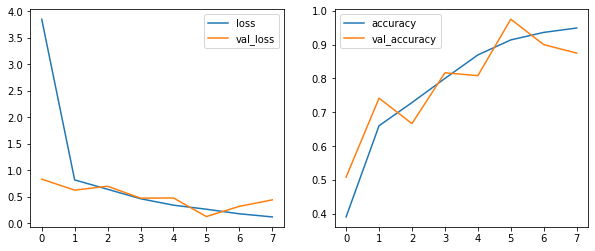

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(10, 4))

history_df = pd.DataFrame(history.history)
history_df[['loss', 'val_loss']].plot(kind='line', ax=ax[0])
history_df[['accuracy', 'val_accuracy']].plot(kind='line', ax=ax[1]);

In [ ]:
df=pd.DataFrame(predicted)
df.to_csv('predictions.csv', sep=',', index=False)

In [ ]:
from tensorflow.keras.optimizers import SGD
##Sequential just symbolises 
model1 = Sequential()
##input layer
model1.add(Dense(50, activation='relu', input_shape= (200,3,3) ))
model1.add(Dense(10, activation='softmax'))
model1.compile(loss='categorical_crossentropy', optimizer=SGD(lr=0.001), metrics=['accuracy'])